In [ ]:
'''n its most basic form the assignment consists of two parts. First you have to read a data file and compute some statistics on that data. Second, you have to generate a plot.

For the first part the instructions will tell you which file to use (this differs from user to user). I suggest you use pandas' read_csv() to read it into a dataframe. As the instructions say, each record corresponds to a temperature range (min, max) for a given station and a given day. The data covers a 10 year period, so there will be multiple observations for each calendar day (say January 1st). Your first task is to group all data by calendar day (so, excluding the year) and computing min and max temperature for each of the 365 days in the year (you should drop the leap year day's data (Feb 29), how to do this is not obvious and is part of the assignment to figure out).

Once you have the 10-year data 2005-2014 plot the min and max as two lines, with the x-axis being the calendar day. Shade the area in between.

Then plot the data from 2015 that falls outside of the 2005-2014 min/max range by calendar day. Finally pretty it up: remove unnecessary stuff, add a legend and labels.'''

<IPython.core.display.Javascript object>


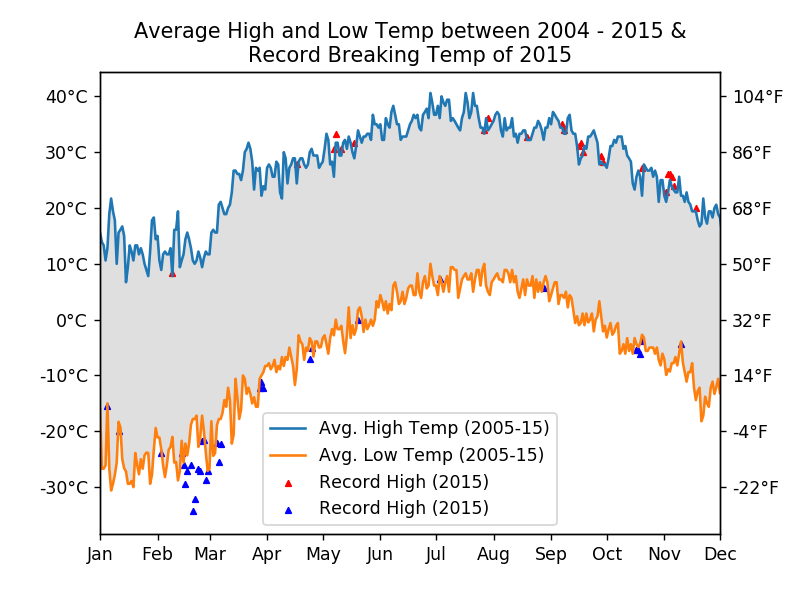

In [4]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib as mpllabel
import numpy as np
import matplotlib.pyplot as plt
import calendar
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')
monthsFmt = mdates.DateFormatter('%b')

df = pd.read_csv("fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv",parse_dates=['Date'])
# drop leap year data
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

df_2015 = df[(df['Date'].dt.year == 2015)]

df = df[~((df['Date'].dt.year < 2005) | (df['Date'].dt.year > 2014))]

max_df = df[df['Element'] == "TMAX"]
min_df = df[df['Element'] == "TMIN"]


max_values = max_df.groupby([max_df['Date'].dt.month,max_df['Date'].dt.day])['Data_Value'].agg(max)

min_values = min_df.groupby([min_df['Date'].dt.month,min_df['Date'].dt.day])['Data_Value'].agg(min)


date_rng = pd.date_range('1/1/2015','31/12/2015' ,freq='d')


plt.figure()
ax = plt.subplot(111)
ax.plot(date_rng,max_values,linestyle='solid',label='Avg. High Temp (2005-15)')
ax.plot(date_rng,min_values,linestyle='solid',label='Avg. Low Temp (2005-15)')

ax.fill_between(date_rng,max_values,min_values,facecolor='gray', alpha=0.25)

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
monthlabels=ax.get_xticks()
ax.set_xlim(monthlabels[0],monthlabels[-2])



max_df_2015 = df_2015[df_2015['Element'] == "TMAX"]
min_df_2015 = df_2015[df_2015['Element'] == "TMIN"]
max_values_2015 = max_df_2015.groupby([max_df_2015['Date'].dt.month,max_df_2015['Date'].dt.day])['Data_Value'].agg(max)
min_values_2015 = min_df_2015.groupby([min_df_2015['Date'].dt.month,min_df_2015['Date'].dt.day])['Data_Value'].agg(min)

max_max_values_df = pd.DataFrame({"Values_ten_years":max_values,"Values_2015":max_values_2015})
max_max_values_df['greatest'] = np.where(max_max_values_df['Values_2015'] > max_max_values_df['Values_ten_years'],max_max_values_df['Values_2015'],np.nan)

min_min_values_df = pd.DataFrame({"Values_ten_years":min_values,"Values_2015":min_values_2015})
min_min_values_df['lowest'] = np.where(min_min_values_df['Values_2015'] < min_min_values_df['Values_ten_years'],min_min_values_df['Values_2015'],np.nan)

ax.scatter(date_rng, max_max_values_df.greatest, s=10, c="red", label = "Record High (2015)",marker='^')
ax.scatter(date_rng, min_min_values_df.lowest, s=10, c="blue", label = "Record High (2015)",marker='^')

t = u"\u00b0"

ax1 = ax.twinx()
ax1.set_yticks(ax.get_yticks())
ax1.set_ylim(ax.get_ylim())
ax1.set_yticklabels(map(lambda x: u'{:.0f}{}{}'.format((x/10*1.8)+32,t,'F'),ax1.get_yticks()))
ax.set_yticklabels(map(lambda x: u'{:.0f}{}{}'.format(x/10,t,'C'),ax.get_yticks()))

title = "Average High and Low Temp between 2004 - 2015 &" + "\n" + "Record Breaking Temp of 2015"
plt.title(title,fontsize=12)

ax.legend(loc='best')
